## Polynomial Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("polynomialRegression.csv", sep=";")

In [3]:
y = df.araba_max_hiz.values.reshape(-1,1)

x = df.araba_fiyat.values.reshape(-1,1)

Yukarıdaki kod bloğunda ".values" ifadesi series'i array'e çevirir.

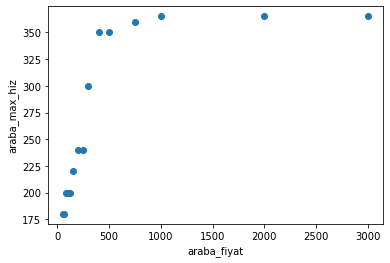

In [4]:
plt.scatter(x,y)
plt.ylabel("araba_max_hiz")
plt.xlabel("araba_fiyat")
plt.show()

<font color = "OrangeRed" ><br>
Linear Regression = b0 + b1 * x
<br>
<font color = "OrangeRed" ><br>
Multiple Linear Regression = b0 + b1 * x1 + b2 * x2 + ... + bn * xn

Linear Regression 'u sonucu etkileyen 1 tane feature olduğunda kullanırız.

Multiple Linear Regression 'u sonucu etkileyen 1'den fazla sayıda feature olduğunda kullanırız.

Burada arabanın hızını etkileyen araba_fiyat feature'sinden başka feature'de olsaydı Multiple Linear Regression 'u kullanırdık. Fakat burada sonucu etkileyen 1 tane feat<ure olduğu için Linear Regression'u kullanırız.

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x,y)  #Bu satır ile yukarıdaki görselde gördüğünüz noktalara en uygun line'ı fit ediyoruz.

y_head = lr.predict(x)

y_head

array([[240.10817425],
       [240.7435423 ],
       [241.37891035],
       [242.64964646],
       [243.92038256],
       [245.82648672],
       [249.00332698],
       [252.18016724],
       [255.3570075 ],
       [261.71068803],
       [268.06436855],
       [283.94856986],
       [299.83277117],
       [363.3695764 ],
       [426.90638163]])

<font color="MediumAquaMarine"><br>
lr.fit(x,y)  
    
Bu satır ile yukarıdaki görselde gördüğünüz noktalara en uygun line'ı fit ediyoruz. En uygun line, MSE değerini minimuma indiren line'dır.

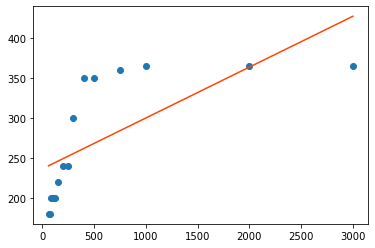

In [6]:
plt.scatter(x,y)
plt.plot(x, y_head, color="OrangeRed")
plt.show()

In [8]:
lr.predict([[10000]])

array([[871.66401826]])

Eğer arabanın fiyatı 10000 tl ise arabanın maksimum hızı 871 km/sa olacaktır sonucunu elde ettik. 871 km/sa yaklaşık bir uçağın hızıdır. Bir araba için bu hız mümkün değildir. Böyle bir sonuç elde etmemizin sebebi, data'nın linear regression metodu için uygun olmamasıdır. Çünkü veri seti linear değildir. 

Bu data'yı daha doğru bir şekilde fit edebilmemiz için:

Polynomial Linear Regression = b0 + b1 * x + b2 * x^2

Şeklinde 2.dereceden polynomial ifadeler uygulamalıyız.



<font color = "OrangeRed"><br>
Polynomial Linear Regression = b0 + b1 * x + b2 * x^2 + ... + bn * x^n
    
Linear regression ile düz bir line elde ediyorduk. Polynomial Linear Regression ile noktaların dağılımına daha uygun olabilecek kıvraklıkta bir line elde edebilmemiz mümkün. Yani Polynomial Linear Regression ile eğimi artırılmış bir line elde edebiliyoruz.
    
Eğer model Linear Regression'a uygun değil ise Polynomial Linear Regression ile eğimi artırabiliriz. 
    
bn * x^n şeklindeki ifadelere parabolic denir.

Şimdi 2.dereceden bir polynomial linear regression uygulayalım.

In [10]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = PolynomialFeatures(degree = 2)

# x^2 şeklinde bir feature elde etmeliyiz. Çünkü veri setinde araba_fiyat'ın karesi diye bir feature yok.

x_polynomial = polynomial_regression.fit_transform(x)

x_polynomial = polynomial_regression.fit_transform(x)

Bu satırın anlamı şudur: polynomial_regression = PolynomialFeatures(degree = 2) satırı ile PolynomialFeatures'i kullandık ve degree = 2 'den dolayı _transform(x) ifadesi ile araba_fiyat'ını (x=araba_fiyat) 2.dereceden polynomial feature'ye çevirir.

fit_transform ile uygula ve çevir işlemini yapmış oluyoruz.

In [13]:
x_polynomial

array([[1.000e+00, 6.000e+01, 3.600e+03],
       [1.000e+00, 7.000e+01, 4.900e+03],
       [1.000e+00, 8.000e+01, 6.400e+03],
       [1.000e+00, 1.000e+02, 1.000e+04],
       [1.000e+00, 1.200e+02, 1.440e+04],
       [1.000e+00, 1.500e+02, 2.250e+04],
       [1.000e+00, 2.000e+02, 4.000e+04],
       [1.000e+00, 2.500e+02, 6.250e+04],
       [1.000e+00, 3.000e+02, 9.000e+04],
       [1.000e+00, 4.000e+02, 1.600e+05],
       [1.000e+00, 5.000e+02, 2.500e+05],
       [1.000e+00, 7.500e+02, 5.625e+05],
       [1.000e+00, 1.000e+03, 1.000e+06],
       [1.000e+00, 2.000e+03, 4.000e+06],
       [1.000e+00, 3.000e+03, 9.000e+06]])

Polynomial Linear Regression = b0 + b1 * x + b2 * x^2 ifadesinde,

Çıktıda 1.sütun denklemde b0 kısmındaki x^0 'ı ifade eder. Yani x^0=1 olduğundan 1.sütunda 1 değerlerini görüyorsunuz.

Çıktıda 2.sütun denklemde b1 * x kısmındaki x 'i ifade eder. Yani x=60 olduğundan 1.sütunda 60 değerini görüyorsunuz.

Çıktıda 3.sütun denklemde b2 * x^2 kısmındaki x^2 'yi ifade eder. Yani 60^2=3600 olduğundan 1.sütunda 3600 değerini görüyorsunuz.

Şimdi elde ettiğimiz bu feature'yi kullanarak line fit yapalım.

In [15]:
linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial,y)

LinearRegression()

Şimdi görselleştirme yapalım.

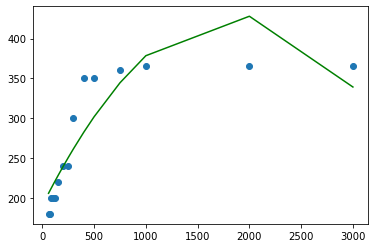

In [18]:
plt.scatter(x,y)
y_head2 = linear_regression2.predict(x_polynomial)
plt.plot(x, y_head2, color="green", label="poly")
plt.legend
plt.show()

Çıktıda gördüğünüz üzere linear regression 'da olan düz çizgidense, burada noktalara uygun daha doğru bir line elde ettik.

Bu line'ı degree değerini artırarak daha da iyileştirebilmemiz mümkün. degree değerini artırarak modelin daha da karmaşıklaşacağını görelim:

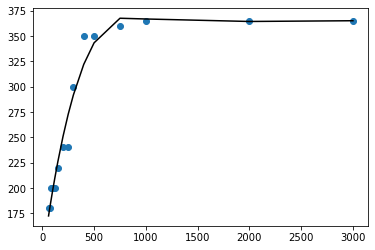

In [19]:
polynomial_regression = PolynomialFeatures(degree = 4)

x_polynomial = polynomial_regression.fit_transform(x)

linear_regression2 = LinearRegression()

linear_regression2.fit(x_polynomial,y)

plt.scatter(x,y)
y_head2 = linear_regression2.predict(x_polynomial)
plt.plot(x, y_head2, color="black", label="poly")
plt.legend
plt.show()

degree'nin artırılması ile daha karmaşık bir model elde ettik. Böylece veri setine neredeyse tam uyacak şekilde, MSE değeri çok küçük olacak şekilde bir model oluşturmuş olduk.